<a href="https://colab.research.google.com/github/jonahcoutinho/Time-Series-forcasting-COVID-VARZEO-/blob/master/Major_Project_Jonah(final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SmartKnower Major Project**

~Jonah Coutinho

Import Data

In [ ]:
import pandas as pd
df = pd.read_csv('/content/owid-covid-data.csv')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80515,ZWE,Africa,Zimbabwe,2021-04-05,36934.0,11.0,13.571,1525.0,0.0,0.714,2484.975,0.740,0.913,102.604,0.000,0.048,0.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1171.0,444359.0,29.897,0.079,1597.0,0.107,0.008,117.7,tests performed,145510.0,123454.0,22056.0,6610.0,9129.0,0.98,0.83,0.15,614.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
80516,ZWE,Africa,Zimbabwe,2021-04-06,36966.0,32.0,18.143,1531.0,6.0,1.571,2487.128,2.153,1.221,103.008,0.404,0.106,0.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1604.0,445963.0,30.005,0.108,1444.0,0.097,0.013,79.6,tests performed,162633.0,139133.0,23500.0,17123.0,10967.0,1.09,0.94,0.16,738.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
80517,ZWE,Africa,Zimbabwe,2021-04-07,36984.0,18.0,14.571,1531.0,0.0,1.143,2488.339,1.211,0.980,103.008,0.000,0.077,0.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3301.0,449264.0,30.227,0.222,1710.0,0.115,0.009,117.4,tests performed,179417.0,153238.0,26179.0,16784.0,12505.0,1.21,1.03,0.18,841.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0

In [ ]:
df = df.mask(df.eq(0)).dropna(how='all', axis=1)
df = df[df['continent'].notna()]

Check for Null values

In [ ]:
df.isnull().sum()

iso_code                                     0
continent                                    0
location                                     0
date                                         0
total_cases                               1622
new_cases                                17988
new_cases_smoothed                        7389
total_deaths                             10940
new_deaths                               38257
new_deaths_smoothed                      23790
total_cases_per_million                   1622
new_cases_per_million                    17988
new_cases_smoothed_per_million            7401
total_deaths_per_million                 10940
new_deaths_per_million                   38257
new_deaths_smoothed_per_million          23934
reproduction_rate                        12703
icu_patients                             68560
icu_patients_per_million                 68560
hosp_patients                            66623
hosp_patients_per_million                66623
weekly_icu_ad

Use only required columns

In [ ]:
df_new=df[['location','continent','date','total_cases','new_cases','total_deaths','new_deaths']]
df_new

,location,continent,date,total_cases,new_cases,total_deaths,new_deaths
0,Afghanistan,Asia,2020-02-24,1.0,1.0,NaN,NaN
1,Afghanistan,Asia,2020-02-25,1.0,NaN,NaN,NaN
2,Afghanistan,Asia,2020-02-26,1.0,NaN,NaN,NaN
3,Afghanistan,Asia,2020-02-27,1.0,NaN,NaN,NaN
4,Afghanistan,Asia,2020-02-28,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
80515,Zimbabwe,Africa,2021-04-05,36934.0,11.0,1525.0,NaN
80516,Zimbabwe,Africa,2021-04-06,36966.0,32.0,1531.0,6.0
80517,Zimbabwe,Africa,2021-04-07,36984.0,18.0,1531.0,NaN
80518,Zimbabwe,Africa,2021-04-08,37052.0,68.0,1532.0,1.0


Check for Null Values

In [ ]:
df_new.isnull().sum()

location            0
continent           0
date                0
total_cases      1622
new_cases       17988
total_deaths    10940
new_deaths      38257
dtype: int64

What i have done is maintained 2 dataframes:

1.   df1 - where null values are dropped
2.   df2 - where null values are filled with mean values





In [ ]:
df1=df_new.dropna()
df2=df_new.fillna(df1.mean())

Reconfirm that No null Values present

In [ ]:
df1.isnull().sum()
df2.isnull().sum()

location        0
continent       0
date            0
total_cases     0
new_cases       0
total_deaths    0
new_deaths      0
dtype: int64

Use only required fields for forcasting and rename them, appropriatly
Also, type cast the date and other fields to required type


In [ ]:
df1 = df1.rename(columns={'date':'ds','total_cases':'y'})
df2 = df2.rename(columns={'date':'ds','total_cases':'y'})
df1['ds']=pd.to_datetime(df1['ds'])
df2['ds']=pd.to_datetime(df2['ds'])
df1['y'] = df1['y'].astype(int)
df2['y'] = df2['y'].astype(int)



Cross check type

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38070 entries, 27 to 80519
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   location      38070 non-null  object        
 1   continent     38070 non-null  object        
 2   ds            38070 non-null  datetime64[ns]
 3   y             38070 non-null  int64         
 4   new_cases     38070 non-null  float64       
 5   total_deaths  38070 non-null  float64       
 6   new_deaths    38070 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 2.3+ MB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76598 entries, 0 to 80519
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   location      76598 non-null  object        
 1   continent     76598 non-null  object        
 2   ds            76598 non-null  datetime64[ns]
 3   y             76598 non-null  int64         
 4   new_cases     76598 non-null  float64       
 5   total_deaths  76598 non-null  float64       
 6   new_deaths    76598 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 4.7+ MB


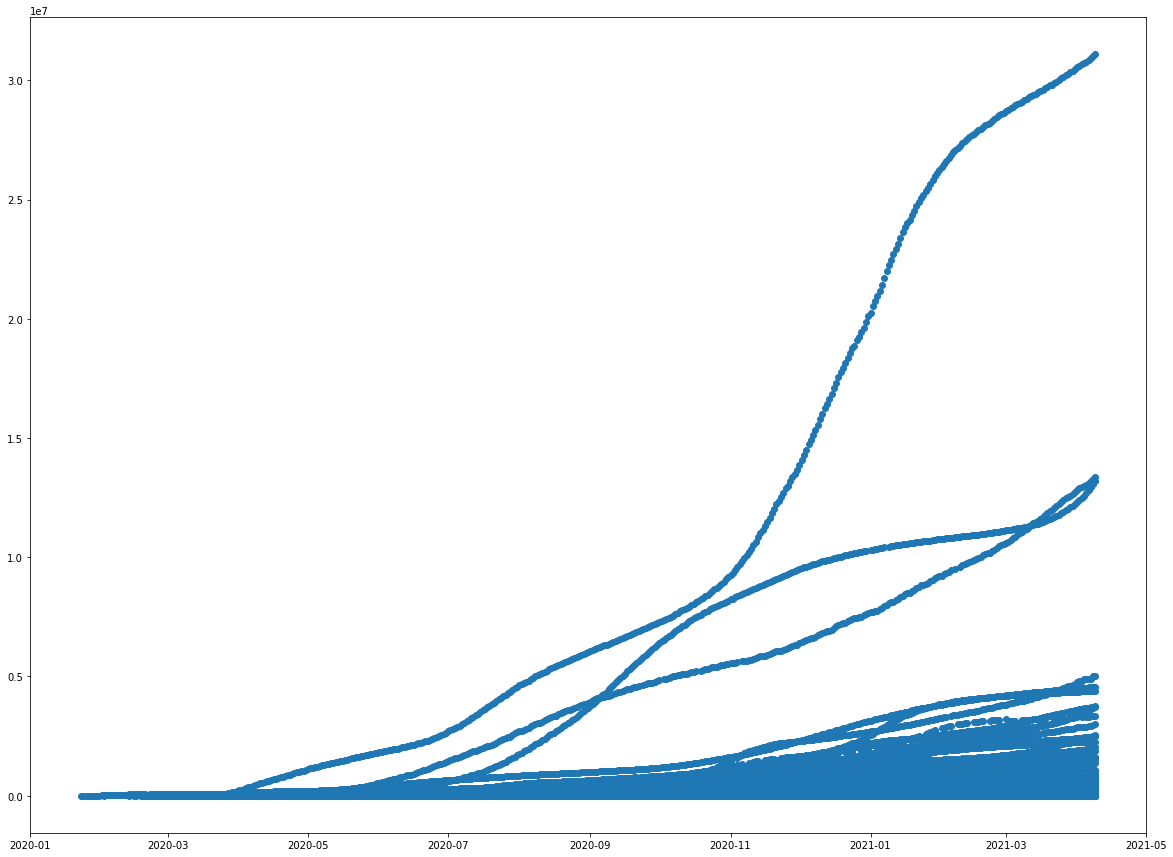

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
plt.scatter(df1['ds'],df1['y'])
plt.show()

Use FB prophet library for forcasting

In [ ]:
from fbprophet import Prophet
model1 = Prophet(changepoint_prior_scale=1)
model1.fit(df1)
forecast1 = model1.make_future_dataframe(periods=30,freq='D')
forecast1 = model1.predict(forecast1)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Create model

In [ ]:
from fbprophet import Prophet
model2 = Prophet(changepoint_prior_scale=1)
model2.fit(df2)
forecast2 = model2.make_future_dataframe(periods=30,freq='D')
forecast2 = model2.predict(forecast2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Select required columns

In [ ]:
forecast1[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-23,-42486.433930,-2.444409e+06,2.036841e+06
1,2020-01-24,-34034.469952,-2.482741e+06,2.299067e+06
2,2020-01-25,-14309.737528,-2.342629e+06,2.418668e+06
3,2020-01-26,-17135.703622,-2.449049e+06,2.463354e+06
4,2020-01-27,-39186.323628,-2.460121e+06,2.374183e+06


In [ ]:
forecast2[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-01,249860.534742,-1.591081e+06,1.847082e+06
1,2020-01-02,247085.584612,-1.431571e+06,1.980035e+06
2,2020-01-03,244195.840329,-1.290822e+06,1.862808e+06
3,2020-01-04,240926.502575,-1.442062e+06,1.985639e+06
4,2020-01-05,238322.325571,-1.428729e+06,2.046314e+06


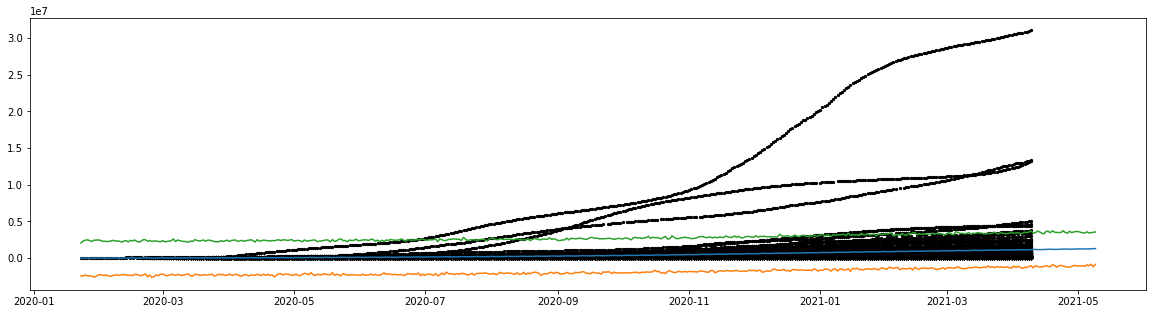

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.scatter(df1['ds'],df1['y'],s=5,c='k')
plt.plot(forecast1['ds'],forecast1['yhat'])
plt.plot(forecast1['ds'],forecast1['yhat_lower'])
plt.plot(forecast1['ds'],forecast1['yhat_upper'])
plt.show()

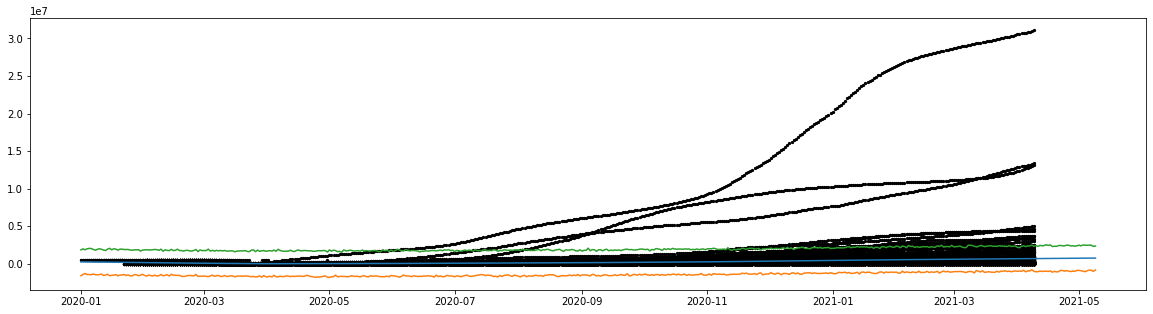

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.scatter(df2['ds'],df2['y'],s=5,c='k')
plt.plot(forecast2['ds'],forecast2['yhat'])
plt.plot(forecast2['ds'],forecast2['yhat_lower'])
plt.plot(forecast2['ds'],forecast2['yhat_upper'])
plt.show()

Avoid the  above code for a more direct approach

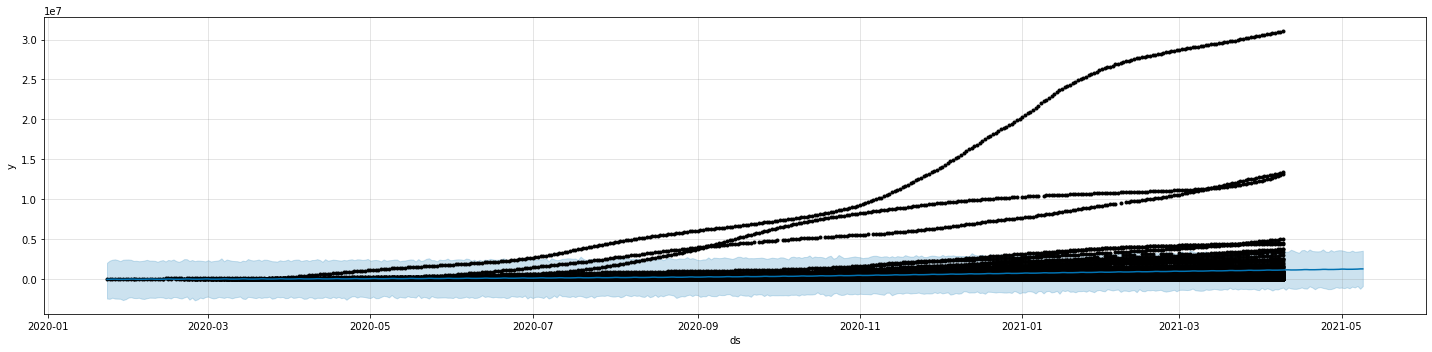

In [ ]:

model1.plot(forecast1,figsize=(20,5));

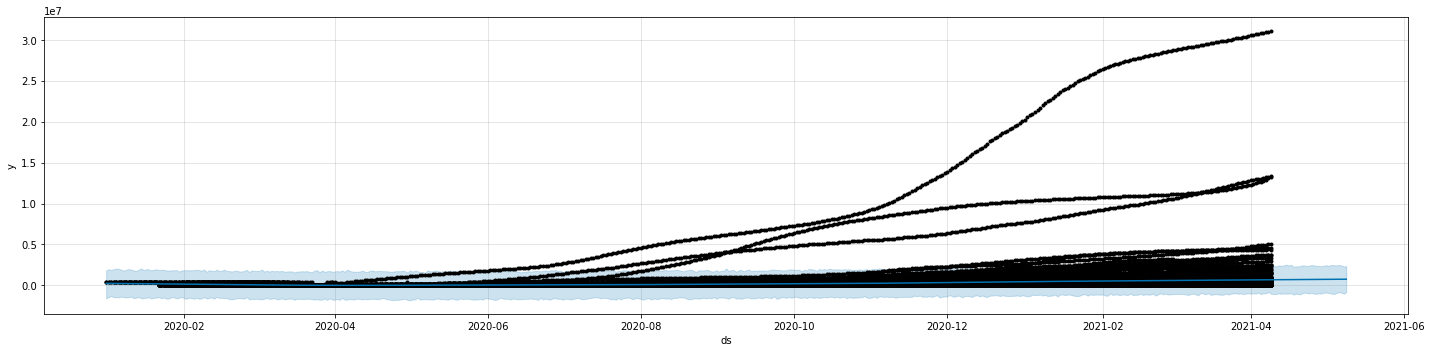

In [ ]:

model2.plot(forecast2,figsize=(20,5));

From the graphs, we see that there is hardly any difference between df1 and df2

Now , To answer the questions

In [ ]:
init_date = "2021-04-09"
filtered_dates = df_new["date"] >= init_date
new_df = df_new.loc[filtered_dates]
new_df


,location,continent,date,total_cases,new_cases,total_deaths,new_deaths
410,Afghanistan,Asia,2021-04-09,57019.0,76.0,2521.0,5.0
1242,Albania,Europe,2021-04-09,127795.0,286.0,2304.0,7.0
1652,Algeria,Africa,2021-04-09,118251.0,135.0,3123.0,4.0
2056,Andorra,Europe,2021-04-09,12456.0,47.0,120.0,NaN
2442,Angola,Africa,2021-04-09,23242.0,134.0,549.0,NaN
...,...,...,...,...,...,...,...
78493,Venezuela,South America,2021-04-09,172461.0,1088.0,1739.0,19.0
78936,Vietnam,Asia,2021-04-09,2683.0,15.0,35.0,NaN
79745,Yemen,Asia,2021-04-09,5233.0,100.0,1022.0,18.0
80133,Zambia,Africa,2021-04-09,89783.0,191.0,1226.0,1.0


In [ ]:
new_df = new_df.fillna(0)
new_df

,location,continent,date,total_cases,new_cases,total_deaths,new_deaths
410,Afghanistan,Asia,2021-04-09,57019.0,76.0,2521.0,5.0
1242,Albania,Europe,2021-04-09,127795.0,286.0,2304.0,7.0
1652,Algeria,Africa,2021-04-09,118251.0,135.0,3123.0,4.0
2056,Andorra,Europe,2021-04-09,12456.0,47.0,120.0,0.0
2442,Angola,Africa,2021-04-09,23242.0,134.0,549.0,0.0
...,...,...,...,...,...,...,...
78493,Venezuela,South America,2021-04-09,172461.0,1088.0,1739.0,19.0
78936,Vietnam,Asia,2021-04-09,2683.0,15.0,35.0,0.0
79745,Yemen,Asia,2021-04-09,5233.0,100.0,1022.0,18.0
80133,Zambia,Africa,2021-04-09,89783.0,191.0,1226.0,1.0


QUESTION :


i) Which country/state is having highest number of cases?

In [ ]:
column = new_df['total_cases']
max_index = column.idxmax()
highest_case=df_new.loc[max_index,:]
highest_case

location        United States
continent       North America
date               2021-04-09
total_cases       3.10841e+07
new_cases               81801
total_deaths           561074
new_deaths                958
Name: 76766, dtype: object

ii) Which country/state is having lowest number of cases?

In [ ]:
column = new_df['total_cases']
min_index = column.idxmin()
lowest_case=df_new.loc[min_index,:]
lowest_case

location        Micronesia (country)
continent                    Oceania
date                      2021-04-09
total_cases                        1
new_cases                        NaN
total_deaths                     NaN
new_deaths                       NaN
Name: 47289, dtype: object

iii) Which country/state is having lowest number of deaths?

In [ ]:
column = new_df['total_deaths']
min_death = column.idxmin()
lowest_death=df_new.loc[min_death,:]
lowest_death

location             Dominica
continent       North America
date               2021-04-09
total_cases               165
new_cases                 NaN
total_deaths              NaN
new_deaths                NaN
Name: 20834, dtype: object

iv) Which country/state is having highest number of deaths?

In [ ]:
column = new_df['total_deaths']
max_death = column.idxmax()
highest_death=df_new.loc[max_death,:]
highest_death

location        United States
continent       North America
date               2021-04-09
total_cases       3.10841e+07
new_cases               81801
total_deaths           561074
new_deaths                958
Name: 76766, dtype: object

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

Thank **You**